# <center> Wine-Quality Prediction 🍷 </center>

### In this Notebook, we will be trying to predict the quality of Red Wine <mark>without even tasting it😉</mark>,Yes it is indeed possible by using Machine Learning and for every ML project we need a data right so here you have a <mark>Wine-Quality dataset</mark> which consists of <mark>12 columns</mark>, and <mark> 1599 rows </mark>. 
### You can get the dataset from here -> [Wine-Quality-Dataset](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009).

<div style="border-radius:10px;
            border : black solid;
            background-color: #a5ecdc;
            font-size:110%;
            text-align: left;
            opacity: 0.8;" >

<h2 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center> Explanation of the variables </center></h2>  
    
* **Fixed Acidity** -> most acids involved with wine or fixed or nonvolatile (do not evaporate readily).
    
* **Volatile Acidity** -> the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
    
* **Citric Acid**: found in small quantities, citric acid can add 'freshness' and flavor to wines.
    
* **Residual Sugar**: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter.
    
* **Chlorides**: the amount of salt in the wine.
    
* **free sulfur dioxide**: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion.
    
* **total sulfur dioxide**: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2.
    
* **density**: the density of water is close to that of water depending on the percent alcohol and sugar content.
    
* **pH**: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4.
    
* **sulphates**: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial.
    
* **Alcohol**: this is the percent alcohol content of the wine.
    
* **quality**: output variable (based on sensory data, score between 3 and 8).

<div style="border-radius:10px;
            border : black solid;
            background-color: #000000;
            font-size:110%;
            text-align: left">
<span style='color:#FFFFFF'><a id="1"></a>

## <b>1 -> <span style='color:#FFFFFF'>IMPORTING NECESSARY LIBRARIES</span></b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="border-radius:10px;
            border : black solid;
            background-color: #000000;
            font-size:110%;
            text-align: left">
<span style='color:#FFFFFF'><a id="2"></a>

## <b>2 -> <span style='color:#FFFFFF'>LOAD DATASET</span></b>

In [2]:
data = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
df = data.copy() #making a copy so that we can test some things if needed, so that we won't have to use original data.

<div style="border-radius:10px;
            border : black solid;
            background-color: #000000;
            font-size:110%;
            text-align: left">
<span style='color:#FFFFFF'><a id="3"></a>

## <b>3 -> <span style='color:#FFFFFF'>Basic Information about the Dataset </span></b>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
print("Quality points:", data["quality"].unique())

Quality points: [5 6 7 4 8 3]


In [6]:
print(data["quality"].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

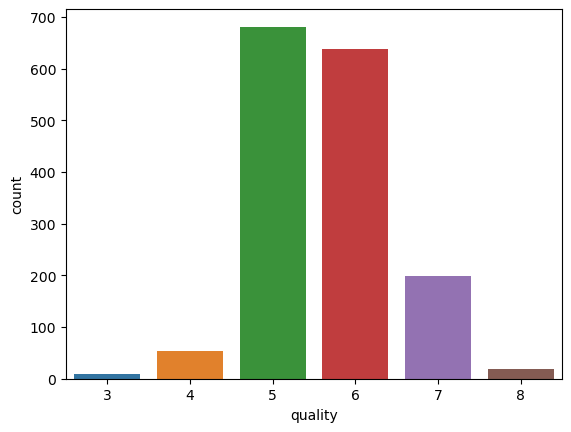

In [7]:
sns.countplot(data, x="quality")

<div style="border-radius:10px;
            border : black solid;
            background-color: #a5ecdc;
            font-size:110%;
            text-align: left;
            opacity: 0.8;" >

<h4 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center> Brief information</center></h4>
It turns out that the dataset <mark><b>does not have null values.</b></mark> The dataset consists of <mark><b>1599 rows and 12 columns.</b></mark> The data type of all variables are <b><mark>float or int.</mark></b>Quality points range from <mark>3 to 8.</mark> Amongst the given quality ratings, <mark>majority testers(~82.4%) had given 5 or 6.</mark>

In [8]:
df.describe().T #T is just for transpose, Chill!

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


<div style="border-radius:10px;
            border : black solid;
            background-color: #a5ecdc;
            font-size:110%;
            text-align: left;
            opacity: 0.8;" >

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center>Basic Insights From Descriptive Stats</center></h4>  
    
    
- The average value of fixed acidity is <mark><b>8.31</b></mark>, the highest value is <mark><b>15.9</b></mark> and you can look for similar values from the table itself.
- Mean values for all the independent variables(all columns except quality) is <mark><b>larger than 50th percentile</b></mark>.
    <b>(Can you tell me in the comments what does it mean?)</b>

In [9]:
df.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

<div style="border-radius:10px;
            border : black solid;
            background-color: #000000;
            font-size:110%;
            text-align: left">
<span style='color:#FFFFFF'><a id="4"></a>

## <b> 4 -> <span style='color:#FFFFFF'> Different types of Visualizations </span></b>

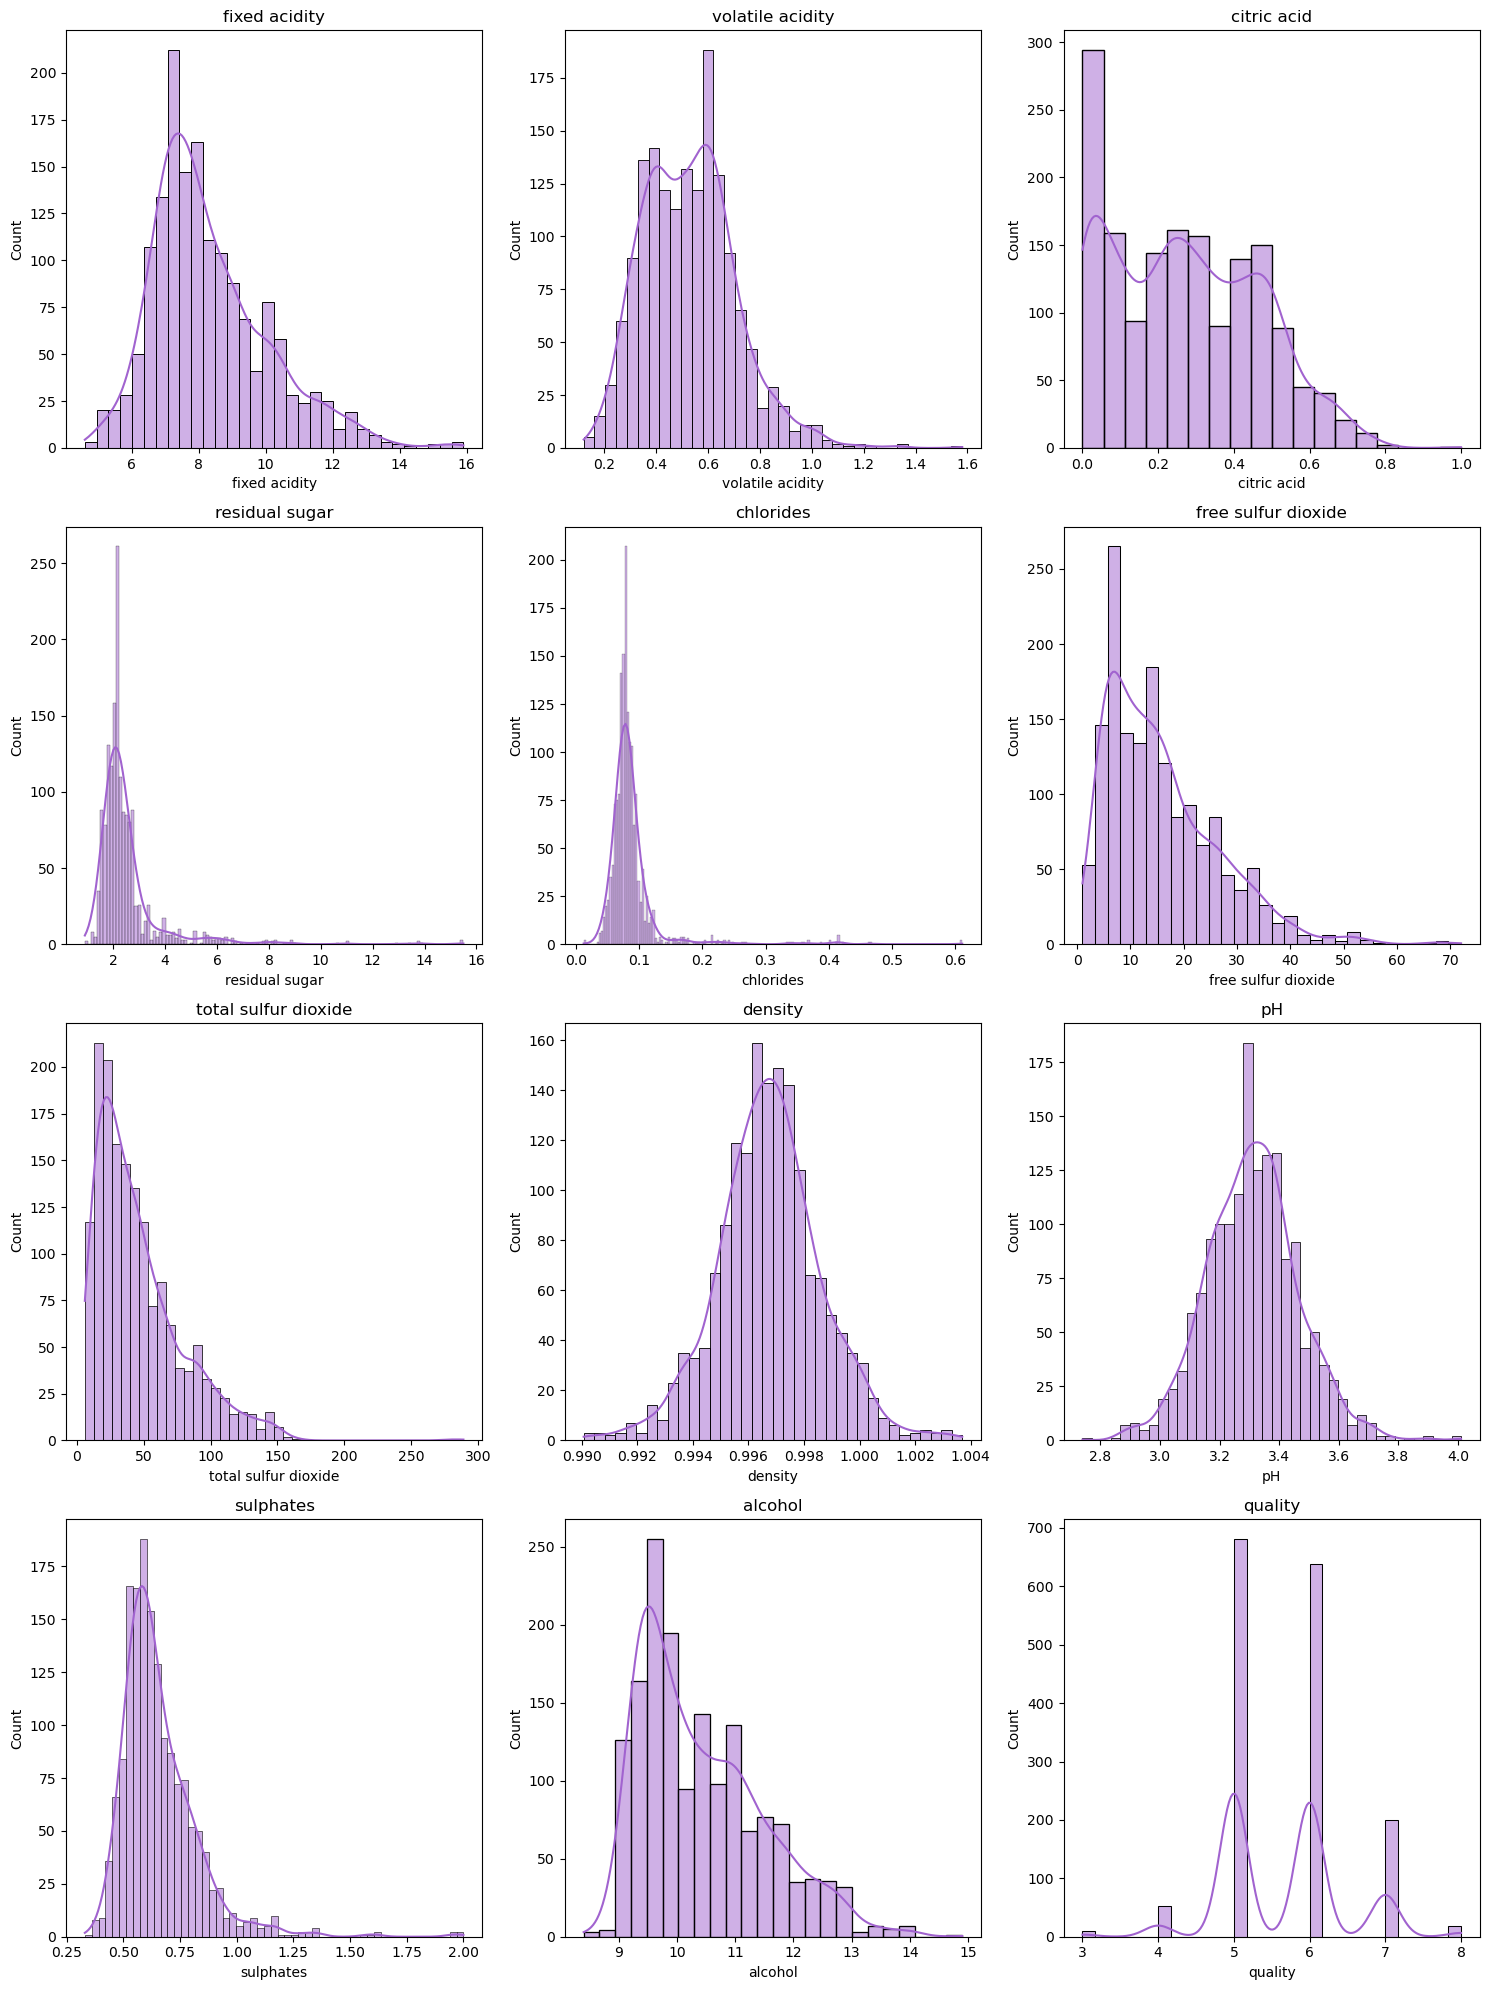

In [10]:
'''
# Get a list of all numerical column names
numerical_cols = data.select_dtypes(include='number').columns.tolist()

# Calculate the number of rows and columns needed for the subplots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Using subplots to create multiple plots in a single figure
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5*n_rows))

# Flatten the subplots array so that we can loop over it with a single index
axs = axs.flatten()

# Loop over the numerical columns and create a histogram for each column
for i, col in enumerate(numerical_cols):
    sns.histplot(data=data, x=col, kde=True, ax=axs[i],color = "#A163CF")
    axs[i].set_title(col)
    
    # Hide the x-axis labels on all but the bottom row of subplots
    if i < len(numerical_cols) - n_cols:
        axs[i].set_xlabel('')
        
plt.tight_layout()
plt.show()
'''
numerical_cols = data.select_dtypes(include='number').columns.tolist()

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

for col, ax in zip(numerical_cols, axs.flat): #iterating over numerical columns, and its respective subplot in flattened axes using zip()
    #col contains number of current numerical column and ax contains the current subplot
    sns.histplot(data=data, x=col, kde=True, ax=ax, color="#A163CF")
    ax.set(title=col)
    if ax.get_subplotspec().is_last_row():
        ax.set(xlabel=col)

plt.tight_layout() #adjust the spacing between the subplots to eliminate overlapping
plt.show()



<div style="border-radius:10px;
            border : black solid;
            background-color: #a5ecdc;
            font-size:110%;
            text-align: left;
            opacity: 0.8;" >

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center>Basic Insights From above histplots based on observations!</center></h4>  
    
    
- fixed acidity looks <mark><b>normal but although its a bit right skewed</b></mark>, similarly with some other features  like sulphates, chlorides.
- Density and pH looks <mark><b>normally distributed</b></mark>
- Some features are not normal as well like <mark><b> alcohol, citric acid. 

In [11]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Scatterplots can be used to visually determine the relationship between two different numeric variables.

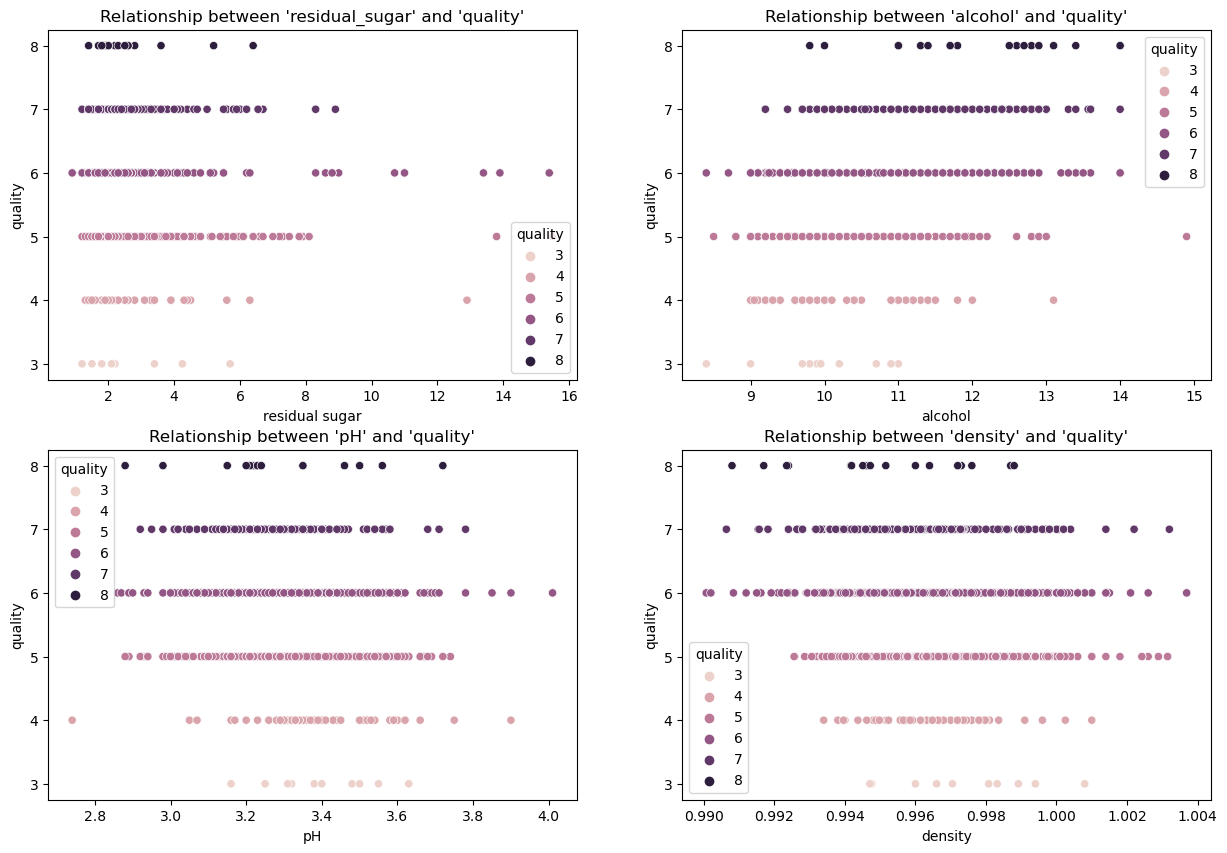

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10)) # subplots is used to make multiple plots in the same block
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "residual sugar",
                y = "quality", hue = "quality",
                data = data).set(title = "Relationship between 'residual_sugar' and 'quality'");

sns.scatterplot(ax = axes[1],
                x = "alcohol",
                y = "quality", hue = "quality",
                data = data).set(title = "Relationship between 'alcohol' and 'quality'");

sns.scatterplot(ax = axes[2],
                x = "pH",
                y = "quality", hue = "quality",
                data = data).set(title = "Relationship between 'pH' and 'quality'");

sns.scatterplot(ax = axes[3],
                x = "density",
                y = "quality", hue = "quality",
                data = data).set(title = "Relationship between 'density' and 'quality'");

#### As we can observe that there is <b><mark> no correlation </mark></b>

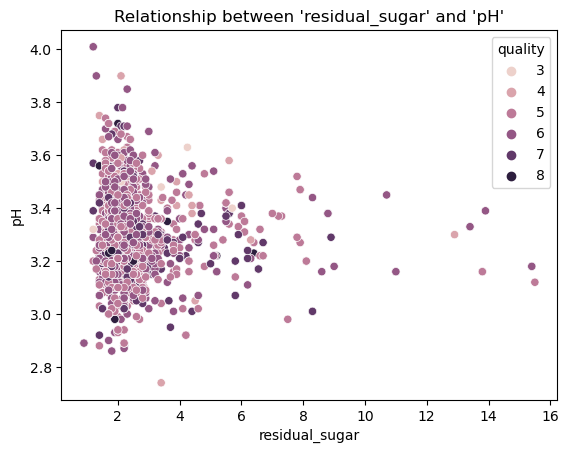

In [13]:
sns.scatterplot(x = "residual_sugar",
                y = "pH",
                hue = "quality",
                data = df).set(title = "Relationship between 'residual_sugar' and 'pH'");

#### As we can observe that there is <b><mark> no correlation between residual_sugar and pH</mark></b>

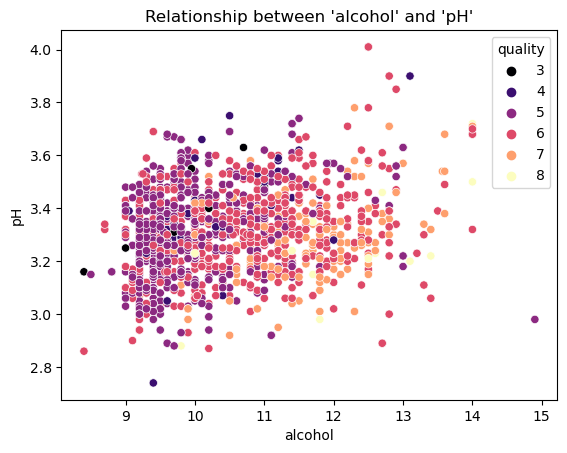

In [14]:
sns.scatterplot(x = "alcohol",
                y = "pH",
                hue = "quality",
                palette = "magma",
                data = df).set(title = "Relationship between 'alcohol' and 'pH'");

#### As we can observe that there is <b><mark> very weak positive or no correlation between alcohol and pH</mark></b>

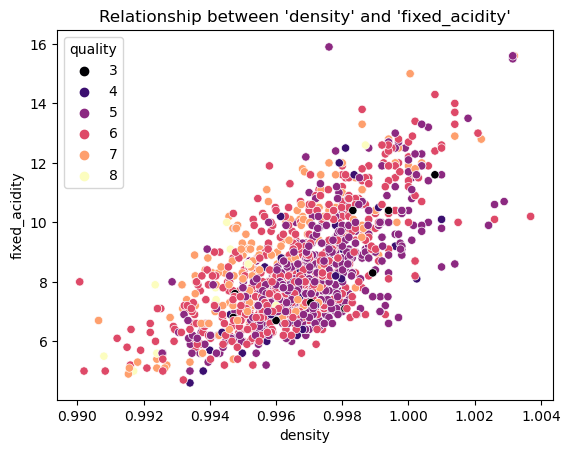

In [15]:
sns.scatterplot(x = "density",
                y = "fixed_acidity",
                hue = "quality",
                palette = "magma",
                data = df).set(title = "Relationship between 'density' and 'fixed_acidity'");

#### As we can observe that there is <b><mark> high positive correlation between density and fixed_acidity</mark></b>

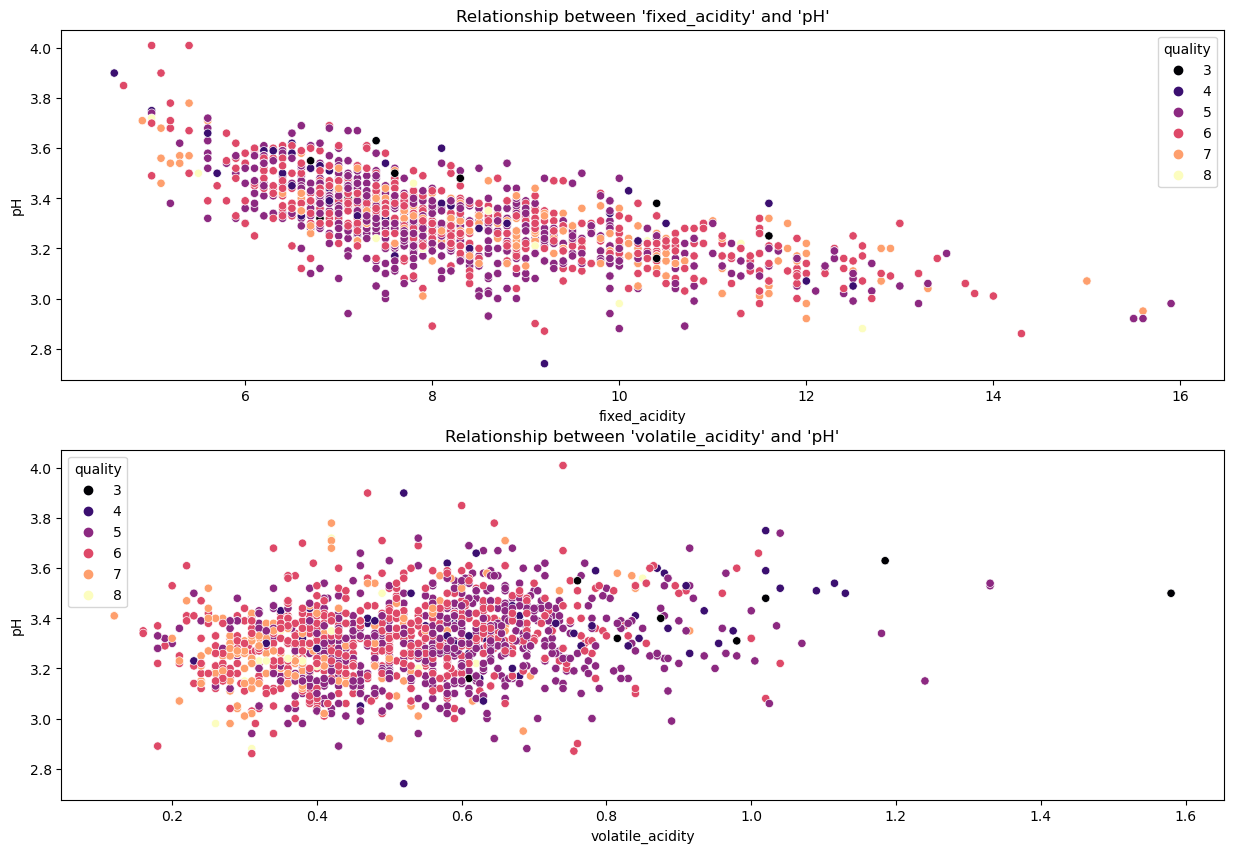

In [16]:
fig, axes = plt.subplots(2, figsize=(15, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "fixed_acidity",
                y = "pH",
                hue = "quality",
                palette = "magma",
                data = df).set(title = "Relationship between 'fixed_acidity' and 'pH'");

sns.scatterplot(ax = axes[1],
                x = "volatile_acidity",
                y = "pH",
                hue = "quality",
                palette = "magma",
                data = df).set(title = "Relationship between 'volatile_acidity' and 'pH'");

#### As we can observe that there is <b><mark> negative correlation between fixed_acidity and pH</mark></b> and a little bit of <b><mark> positive or no correlation between volatile_acidity and pH</mark></b> 

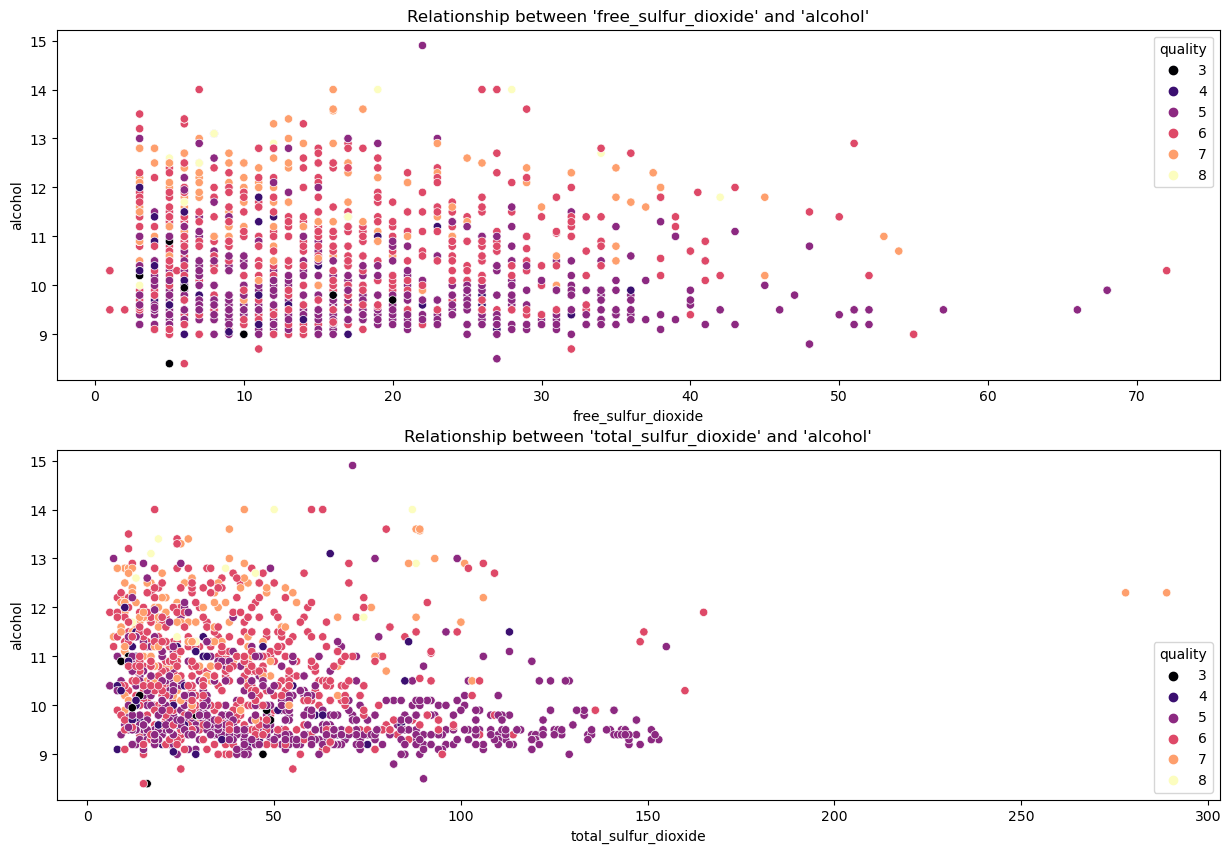

In [17]:
fig, axes = plt.subplots(2, figsize = (15, 10)) 
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "free_sulfur_dioxide",
                y = "alcohol",
                hue = "quality",
                palette = "magma",
                data = df).set(title = "Relationship between 'free_sulfur_dioxide' and 'alcohol'");


sns.scatterplot(ax = axes[1],
                x = "total_sulfur_dioxide",
                y = "alcohol",
                hue = "quality",
                palette = "magma",
                data = df).set(title = "Relationship between 'total_sulfur_dioxide' and 'alcohol'");

#### As we can observe that there is little bit of<b><mark> negative correlation between total_sulfur_acid and alcohol</mark></b>

## HeatMaps can be used to plot correlation values between two variables in a visually attractive and easily readable format.

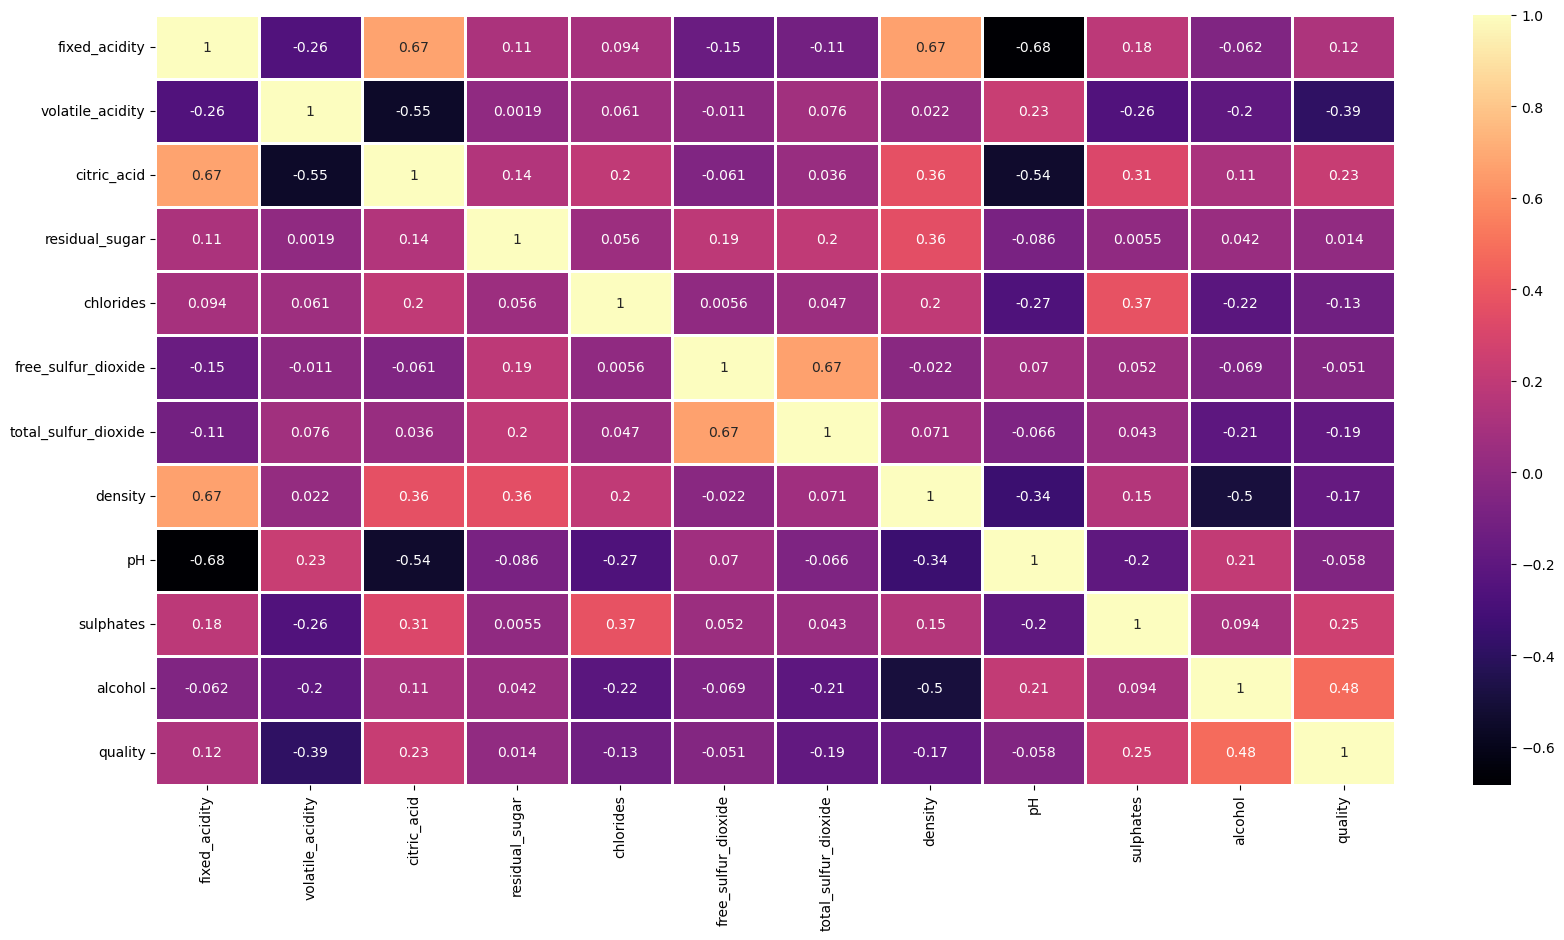

In [18]:
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(df.corr(), annot = True, linewidths = 2, cmap = "magma");

#### <b>We can confirm our findings from the scatterplot, using the above heatmap (which is based on correlation).</b>

<div style="border-radius:10px;
            border : black solid;
            background-color: #000000;
            font-size:110%;
            text-align: left">
<span style='color:#FFFFFF'><a id="5"></a>

## <b> 5 -> <span style='color:#FFFFFF'> Data Preprocessing </span></b>

In [19]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### We can divide the quality in two parts as we have <b><mark>Quality range from 3 to 8</mark></b>:

- High Quality wine: <b><mark>6-8</mark></b>
- Low Quality wine: <b><mark>3-5</mark></b>

In [20]:
df["quality"] = np.where(df["quality"] > 5, 1, 0)

#### Quality>5 are changed to 1 and less that 5 are changed to 0

In [21]:
df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

Splitting the dataset into <mark><b>training(75%) and testing(25%)</b></mark>

In [23]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    random_state = 42)

<div style="border-radius:10px;
            border : black solid;
            background-color: #a5ecdc;
            font-size:110%;
            text-align: left;
            opacity: 0.8;" >

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center>Standardization!</center></h4> 

It basically refers to scaling, as ML is totally based on data, so if we think about it clearly that data of two different scales may end up affecting our model differently.Suppose one of your feature is of the <b><mark>order of 10^3</mark></b> and other feature is of the <b><mark>order of 10^1</mark></b> then the higher order feature may end up affecting our model much more than the lower order one.

To tackle this problem we have many different types of Scaling techniques, one that we are using here is called <b><mark>MinMax scaler</mark></b>, We are using this here because, It is best when your data is <mark>not normally distributed</mark>.

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
norm = MinMaxScaler(feature_range = (0, 1))
norm.fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

In [27]:
print("Shape of training Data: ",X_train.shape)

print("Shape of testing Data: ",X_test.shape)

Shape of training Data:  (1199, 11)
Shape of testing Data:  (400, 11)


#### Now our Data is ready for the <b><mark>Modelling phase!</mark></b>

<div style="border-radius:10px;
            border : black solid;
            background-color: #000000;
            font-size:110%;
            text-align: left">
<span style='color:#FFFFFF'>
<a id="6"></a>
    
## <b> 6 -> <span style='color:#FFFFFF'> Modeling -> Classification Models </span></b>

<b>Importing different models and metrics!</b>

In [28]:

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

<a id="5.1"></a>

#### <b>5.1 <span style='color:#80055D'>|</span>K-Nearest Neighbors (KNN) Model</b>

In [29]:
knn = KNeighborsClassifier()

<div style="border-radius:10px;
            border : black solid;
            background-color: #a5ecdc;
            font-size:110%;
            text-align: left;
            opacity: 0.8;" >
    
### <b> GridSearchCV is used to perform hyperparameter tuning, which helps us in finding the optimal values of the parameters for our model.</b>

#### <mark> Searching for Best Parameters using GridSearchCV method </mark>

In [30]:
knn_params = {"n_neighbors": np.arange(2, 50),
             "weights": ["uniform", "distance"],
             "p": [1, 2]}

knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

#### <mark> Let's see our Best Params </mark>

In [31]:
print("Best score for train set: " + str(knn_cv_model.best_score_))

print("best K value: " + str(knn_cv_model.best_params_["n_neighbors"]),
     "\nbest weights: " + knn_cv_model.best_params_["weights"],
     "\nbest value of p: " + str(knn_cv_model.best_params_["p"])) 

Best score for train set: 0.8090266106442577
best K value: 46 
best weights: distance 
best value of p: 1


<div style="border-radius:10px;
            border : black solid;
            background-color: #a5ecdc;
            font-size:110%;
            text-align: left;
            opacity: 0.8;" >

<b>In the above model</b>:
* K value = n_neighbors -> Number of neighbours 
* weights -> To weight points with greater influence<h4>

#### <b><mark>Building KNN model with the best paramters</mark></b>

In [32]:
knn_model = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
                                weights = knn_cv_model.best_params_["weights"],
                                p = knn_cv_model.best_params_["p"],
                                )

knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=46, p=1, weights='distance')

#### <mark> Accuracy of KNN Model </mark>

In [33]:
y_pred = knn_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7675

#### <b><mark> Classification Report of KNN Model </mark></b>

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       178
           1       0.80      0.77      0.79       222

    accuracy                           0.77       400
   macro avg       0.76      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



<a id="5.2"></a>

### <b>5.2 <span style='color:#80055D'>|</span>Logistic Regression Model</b>

In [35]:
lr = LogisticRegression()

#### <mark> Searching for Best Parameters using GridSearchCV method </mark>

In [36]:
lr_params = {"C": [0.5, 0.75, 1, 1.5, 1.5, 2]}

lr_cv_model = GridSearchCV(lr, lr_params, cv = 10)
lr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 0.75, 1, 1.5, 1.5, 2]})

<div style="border-radius:10px;
            border : black solid;
            background-color: #a5ecdc;
            font-size:110%;
            text-align: left;
            opacity: 0.8;" >


<b>In the above model</b>
    
* C -> Regularization Parameter

#### <mark> Let's see our Best Params </mark>

In [37]:
print("Best score for train set: " + str(lr_cv_model.best_score_))

print("best C value: " + str(lr_cv_model.best_params_["C"]))


Best score for train set: 0.7498039215686274
best C value: 2


#### <b><mark>Building Logistic Regression model with the best paramters</mark></b>

In [38]:
lr_model = LogisticRegression(C = 2)
lr_model.fit(X_train, y_train)

LogisticRegression(C=2)

#### <mark> Accuracy for Logistic Regression Model </mark>

In [39]:
y_pred = lr_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7275

#### <b><mark> Classification Report of Logistic Regression Model </mark></b>

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71       178
           1       0.78      0.71      0.74       222

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400



<a id="5.3"></a>

### <b>5.3 <span style='color:#80055D'>|</span> Decision Tree Classifier Model</b>

In [41]:
dt = DecisionTreeClassifier()

#### <mark> Searching for Best Parameters using GridSearchCV method </mark>

In [42]:
dt_params = {"criterion": ["gini", "entropy"],
             "max_depth": [3, 4, 5, 6, 7],
             "max_features": [4, 5, 6, 7],
             "min_samples_split": [2, 3, 4, 5, 6]}

dt_cv_model = GridSearchCV(dt, dt_params, cv = 10)
dt_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_features': [4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6]})

<div style="border-radius:10px;
            border : black solid;
            background-color: #a5ecdc;
            font-size:110%;
            text-align: left;
            opacity: 0.8;" >


<b>In the above model</b>:
* Criterion -> It measures the quality of a split
* max_depth -> Maximum depth of the tree
* max_features -> Number of features to consider when looking for the best split
* min_samples_split -> Minimum number of samples required to be at a leaf node

#### <mark> Let's see our Best Params </mark>

In [43]:
print("Best score for train set: " + str(dt_cv_model.best_score_))

print("best criterion : " + dt_cv_model.best_params_["criterion"],
     "\nbest max_depth: " + str(dt_cv_model.best_params_["max_depth"]),
     "\nbest max_features: " + str(dt_cv_model.best_params_["max_features"]),
     "\nbest min_samples_split: " + str(dt_cv_model.best_params_["min_samples_split"]))

Best score for train set: 0.7472829131652661
best criterion : gini 
best max_depth: 6 
best max_features: 6 
best min_samples_split: 4


#### <b><mark>Building Decision Tree model with the best paramters</mark></b>

In [44]:
dt = DecisionTreeClassifier(criterion = dt_cv_model.best_params_["criterion"],
                                 max_depth = dt_cv_model.best_params_["max_depth"],
                                 max_features = dt_cv_model.best_params_["max_features"],
                                 min_samples_split = dt_cv_model.best_params_["min_samples_split"])
dt_model = dt.fit(X_train, y_train)

#### <mark> Accuracy of Decision Tree Classifier Model </mark>

In [45]:
y_pred = dt_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7

#### <b><mark> Classification Report of Decision Tree Model </mark></b>

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.69      0.67       178
           1       0.74      0.71      0.72       222

    accuracy                           0.70       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.70      0.70      0.70       400



<a id="5.4"></a>

### <b>5.4 <span style='color:#80055D'>|</span> Random Forest Classifier Model</b>

In [47]:
rf = RandomForestClassifier()

#### <mark> Searching for Best Parameters using GridSearchCV method </mark>

In [48]:
rf_params = {
              "n_estimators": [100, 150, 200],
              "max_depth": [2, 3, 4, 5],
              "min_samples_split": [2, 3, 4, 5]
            }

rf_cv_model = GridSearchCV(rf, rf_params, cv = 10, n_jobs = -1)
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 150, 200]})

<div style="border-radius:10px;
            border : black solid;
            background-color: #a5ecdc;
            font-size:110%;
            text-align: left;
            opacity: 0.8;" >

<b>In the above model</b>:
* n_estimators -> Number of trees in a forest
* max_depth -> Maximum depth of the tree
* min_samples_split -> Minimum number of samples required to be at a leaf node

#### <mark> Let's see our Best Params </mark>

In [49]:
print("Best score for train set: " + str(rf_cv_model.best_score_))

print("\nbest n_estimators: " + str(rf_cv_model.best_params_["n_estimators"]),
     "\nbest max_depth: " + str(rf_cv_model.best_params_["max_depth"]),
     "\nbest min_samples_split: " + str(rf_cv_model.best_params_["min_samples_split"]))

Best score for train set: 0.7740056022408963

best n_estimators: 100 
best max_depth: 5 
best min_samples_split: 4


In [50]:
rf = RandomForestClassifier(
                                 max_depth = rf_cv_model.best_params_["max_depth"],
                                 n_estimators = rf_cv_model.best_params_["n_estimators"],
                                 min_samples_split = rf_cv_model.best_params_["min_samples_split"])
rf_model = rf.fit(X_train, y_train)

#### <mark> Accuracy of Random Forest Classifier </mark>

In [51]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7325

#### <b><mark> Classification Report of Random Forest Model </mark></b>

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71       178
           1       0.77      0.74      0.75       222

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400



<a id="5.5"></a>

### <b>5.5 <span style='color:#80055D'>|</span> Gradient Boosting Machine(GBM) Model</b>

In [53]:
gbm = GradientBoostingClassifier()

#### <mark> Searching for Best Parameters using GridSearchCV method </mark>

In [54]:
gbm_params = {"learning_rate": [0.008, 0.1, 0.15, 0.2],
              "n_estimators": [100, 150, 175],
              "max_depth": [2, 3, 4, 5],
              "min_samples_split": [2, 3, 4]}

gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 5, n_jobs = -1)
gbm_cv_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.008, 0.1, 0.15, 0.2],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 150, 175]})

<div style="border-radius:10px;
            border : black solid;
            background-color: #a5ecdc;
            font-size:110%;
            text-align: left;
            opacity: 0.8;" >

<b>In the above model</b>:
* learning_rate -> Used to shrink the contribution of each tree
* n_estimators -> Number of boosting stages to perform
* max_depth -> Maximum depth of individual estimators
* min_samples_split -> minimum number of samples required to split an internal node

#### <mark> Let's see our Best Params </mark>

In [55]:
print("Best score for train set: " + str(gbm_cv_model.best_score_))

print("best learning_rate value: " + str(gbm_cv_model.best_params_["learning_rate"]),
     "\nbest n_estimators value: " + str(gbm_cv_model.best_params_["n_estimators"]),
     "\nbest max_depth value: " + str(gbm_cv_model.best_params_["max_depth"]),
     "\nbest min_samples_split value: " + str(gbm_cv_model.best_params_["min_samples_split"]))

Best score for train set: 0.8015306834030683
best learning_rate value: 0.2 
best n_estimators value: 150 
best max_depth value: 4 
best min_samples_split value: 2


In [56]:
gbm = GradientBoostingClassifier(learning_rate = gbm_cv_model.best_params_["learning_rate"],
                                 max_depth = gbm_cv_model.best_params_["max_depth"],
                                 n_estimators = gbm_cv_model.best_params_["n_estimators"],
                                 min_samples_split = gbm_cv_model.best_params_["min_samples_split"])
gbm_model = gbm.fit(X_train, y_train)

#### <mark> Accuracy of GBM Model </mark>

In [57]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8025

#### <b><mark> Classification Report of GBM Model </mark></b>

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       178
           1       0.81      0.84      0.82       222

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



<a id="5.6"></a>

### <b>5.6 <span style='color:#80055D'>|</span> Light GBM(LGBM) Model</b>

In [59]:
lgbm = LGBMClassifier()

#### <mark> Searching for Best Parameters using GridSearchCV method </mark>

In [60]:
lgbm_params = {"n_estimators": [100, 120, 150],
              "max_depth": [1, 3, 4, 5],
              "learning_rate": [0.05, 0.08, 0.1, 0.12, 0.15],
              "min_child_samples": [15, 20, 25, 30]}


lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv = 5, n_jobs = -1)
lgbm_cv_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.08, 0.1, 0.12, 0.15],
                         'max_depth': [1, 3, 4, 5],
                         'min_child_samples': [15, 20, 25, 30],
                         'n_estimators': [100, 120, 150]})

<div style="border-radius:10px;
            border : black solid;
            background-color: #a5ecdc;
            font-size:110%;
            text-align: left;
            opacity: 0.8;" >

<b>In the above model</b>:
* learning_rate -> Used to shrink the contribution of each tree
* n_estimators -> Number of boosted trees
* max_depth -> Maximum depth of individual estimators
* min_child_samples -> Minimum number of data needed in a child (leaf)

#### <mark> Let's see our Best Params </mark>

In [61]:
print("Best score for train set: " + str(lgbm_cv_model.best_score_))

print("best learning_rate value: " + str(lgbm_cv_model.best_params_["learning_rate"]),
     "\nbest n_estimators value: " + str(lgbm_cv_model.best_params_["n_estimators"]),
     "\nbest max_depth value: " + str(lgbm_cv_model.best_params_["max_depth"]),
     "\nbest min_child_samples value: " + str(lgbm_cv_model.best_params_["min_child_samples"]))

Best score for train set: 0.8065202231520223
best learning_rate value: 0.15 
best n_estimators value: 150 
best max_depth value: 5 
best min_child_samples value: 20


In [62]:
lgbm = LGBMClassifier(learning_rate = lgbm_cv_model.best_params_["learning_rate"],
                      max_depth = lgbm_cv_model.best_params_["max_depth"],
                      n_estimators = lgbm_cv_model.best_params_["n_estimators"],
                      min_child_samples = lgbm_cv_model.best_params_["min_child_samples"])
lgbm_model = lgbm.fit(X_train, y_train)

#### <mark> Accuracy of LGBM Model </mark>

In [63]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.815

#### <b><mark> Classification Report of LGBM Model </mark></b>

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       178
           1       0.82      0.86      0.84       222

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



# Accuracies of all the Models

In [65]:
from tabulate import tabulate

model_accuracies = {
    'KNN': 0.7675,
    'Logistic Regression': 0.7275,
    'Decision Tree': 0.6875,
    'Random Forest': 0.74,
    'Gradient Boosting Machine': 0.7975,
    'Light Gradient Boosting Machine(LGBM)': 0.815
}

table = [[model, accuracy] for model, accuracy in model_accuracies.items()]

print(tabulate(table, headers=['Model', 'Accuracy'], tablefmt='fancy_grid'))

╒═══════════════════════════════════════╤════════════╕
│ Model                                 │   Accuracy │
╞═══════════════════════════════════════╪════════════╡
│ KNN                                   │     0.7675 │
├───────────────────────────────────────┼────────────┤
│ Logistic Regression                   │     0.7275 │
├───────────────────────────────────────┼────────────┤
│ Decision Tree                         │     0.6875 │
├───────────────────────────────────────┼────────────┤
│ Random Forest                         │     0.74   │
├───────────────────────────────────────┼────────────┤
│ Gradient Boosting Machine             │     0.7975 │
├───────────────────────────────────────┼────────────┤
│ Light Gradient Boosting Machine(LGBM) │     0.815  │
╘═══════════════════════════════════════╧════════════╛


<div style="border-radius:10px;
            border : black solid;
            background-color: #a5ecdc;
            font-size:110%;
            text-align: left;
            opacity: 0.8;" >
    
# Thank you so much for your time and consideration 😁, I hope to receive feedback from you.
# I will be updating this notebook myself as well as from your suggestions, like adding more visualizations,models etc. 